In [7]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

base_dir = '/Volumes/diedrichsen_data$/data/FunctionalFusion'
if not Path(base_dir).exists():
    base_dir = '/srv/diedrichsen/data/FunctionalFusion'

eval_dir = base_dir + '/Models/Evaluation_01'

This notebook plots the cosine error evaluation of the different parcellations

In [42]:
# Load evaluation results
D = pd.read_csv(eval_dir + '/eval_prederr_noHCP.tsv', sep='\t')
D

,Unnamed: 0,model_name,atlas,K,train_data,train_loglik,test_data,indivtrain_ind,indivtrain_val,subj_num,coserr_group,coserr_floor,coserr_ind2,prefix
0,0,asym_Md,MNISymC3,10,['Mdtb'],1.116812e+07,Ibc,half,1,0,0.908734,0.830032,0.891889,asym
1,1,asym_Md,MNISymC3,10,['Mdtb'],1.116812e+07,Ibc,half,1,1,0.884609,0.805813,0.869574,asym
2,2,asym_Md,MNISymC3,10,['Mdtb'],1.116812e+07,Ibc,half,1,2,0.928085,0.852530,0.922031,asym
3,3,asym_Md,MNISymC3,10,['Mdtb'],1.116812e+07,Ibc,half,1,3,0.916124,0.849816,0.912079,asym
4,4,asym_Md,MNISymC3,10,['Mdtb'],1.116812e+07,Ibc,half,1,4,0.942147,0.882212,0.944844,asym
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12995,495,sym_MdPoNiIb,MNISymC3,34,['Mdtb' 'Pontine' 'Nishimoto' 'Ibc'],1.541047e+08,Nishimoto,half,2,1,0.870202,0.714458,0.839127,sym
12996,496,sym_MdPoNiIb,MNISymC3,34,['Mdtb' 'Pontine' 'Nishimoto' 'Ibc'],1.541047e+08,Nishimoto,half,2,2,0.872409,0.693307,0.879907,sym
12997,497,sym_MdPoNiIb,MNISymC3,34,['Mdtb' 'Pontine' 'Nishimoto' 'Ibc'],1.541047e+08,Nishimoto,half,2,3,0.865143,0.685459,0.908961,sym
12998,498,sym_MdPoNiIb,MNISymC3,34,['Mdtb' 'Pontine' 'Nishimoto' 'Ibc'],1.541047e+08,Nishimoto,half,2,4,0.898359,0.736098,0.871215,sym


<AxesSubplot:xlabel='test_data', ylabel='coserr_ind2'>

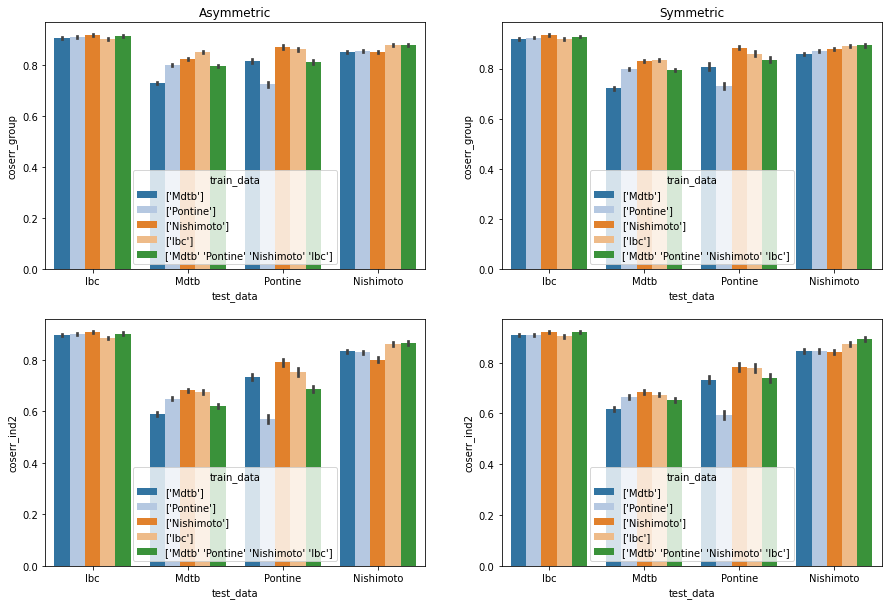

In [43]:
sb.set_palette('tab20')
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sb.barplot(data=D[D.prefix=='asym'],x='test_data',y='coserr_group',hue='train_data')
plt.title('Asymmetric')
plt.subplot(2,2,2)
sb.barplot(data=D[D.prefix=='sym'],x='test_data',y='coserr_group',hue='train_data')
plt.title('Symmetric')
plt.subplot(2,2,3)
sb.barplot(data=D[D.prefix=='asym'],x='test_data',y='coserr_ind2',hue='train_data')
plt.subplot(2,2,4)
sb.barplot(data=D[D.prefix=='sym'],x='test_data',y='coserr_ind2',hue='train_data')

<AxesSubplot:xlabel='K', ylabel='coserr_ind2'>

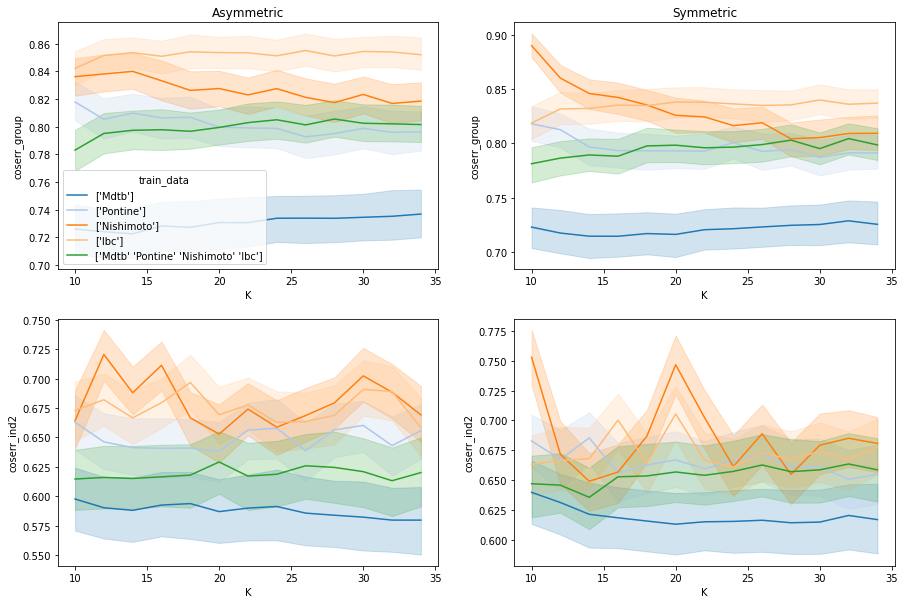

In [45]:
T = D[D.test_data=='Mdtb']
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sb.lineplot(data=T[T.prefix=='asym'],x='K',y='coserr_group',hue='train_data')
plt.title('Asymmetric')
plt.subplot(2,2,2)
sb.lineplot(data=T[T.prefix=='sym'],x='K',y='coserr_group',hue='train_data',legend=False)
plt.title('Symmetric')
plt.subplot(2,2,3)
sb.lineplot(data=T[T.prefix=='asym'],x='K',y='coserr_ind2',hue='train_data',legend=False)
plt.subplot(2,2,4)
sb.lineplot(data=T[T.prefix=='sym'],x='K',y='coserr_ind2',hue='train_data',legend=False)



<AxesSubplot:xlabel='test_data', ylabel='value'>

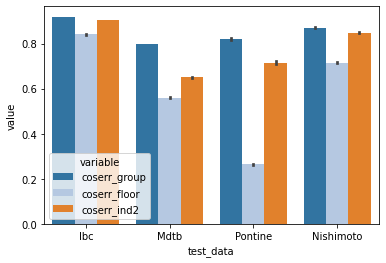

In [41]:
T = D.melt(id_vars=['model_name','K','train_data','test_data','prefix'],\
            value_vars=['coserr_group','coserr_floor','coserr_ind2'])
sb.barplot(data=T,x='test_data',hue='variable',y='value')